In [3]:
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('android_traffic.csv', sep = ';', index_col = 0)
data.head()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
name,,,,,,,,,,,,,,,,
AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


In [5]:
data.tail()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
name,,,,,,,,,,,,,,,,
Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious
Zsone,4,4,1,296,0,0,5,1,86,382,NaN,NaN,NaN,5,1,malicious
Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious
Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious
Zsone,0,0,0,0,0,0,2,2,257,143,NaN,NaN,NaN,2,2,malicious


In [6]:
data.shape

(7845, 16)

In [7]:
data.size

125520

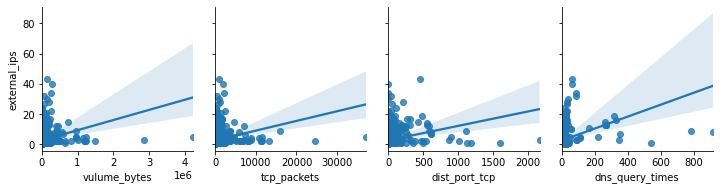

In [73]:
import seaborn as sns

sns.pairplot(data,x_vars = ['vulume_bytes','tcp_packets', 'dist_port_tcp','dns_query_times'], y_vars = ['external_ips'],kind='reg')

In [74]:


x = data[['vulume_bytes','tcp_packets', 'dist_port_tcp','dns_query_times']]

y = data['external_ips']

print (x)
print(y)


           vulume_bytes  tcp_packets  dist_port_tcp  dns_query_times
name                                                                
AntiVirus          3911           36              6                3
AntiVirus         23514          117              0               11
AntiVirus         24151          196              0                9
AntiVirus           889            6              0                1
AntiVirus           882            6              0                1
...                 ...          ...            ...              ...
Zsone                 0            0              0                2
Zsone               296            4              4                1
Zsone                 0            0              0                2
Zsone                 0            0              0                2
Zsone                 0            0              0                2

[7845 rows x 4 columns]
name
AntiVirus    3
AntiVirus    9
AntiVirus    6
AntiVirus    1
AntiVirus    

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(x,y, random_state = 1,test_size= 0.2 )

In [76]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6276, 4)
(1569, 4)
(6276,)
(1569,)


In [77]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
print(linear_reg.intercept_)
print(linear_reg.coef_)

2.4309602868877693
[4.17255274e-06 1.31388264e-04 7.62017772e-03 3.03058709e-02]


In [79]:
list(zip(x,linear_reg.coef_))

[('vulume_bytes', 4.1725527394079305e-06),
 ('tcp_packets', 0.00013138826381631802),
 ('dist_port_tcp', 0.007620177717541425),
 ('dns_query_times', 0.03030587086171931)]

In [80]:
y_pred = linear_reg.predict(X_test)

In [81]:
from sklearn import metrics

print(metrics.mean_squared_error(Y_test,y_pred))

8.003850564595975


{'whiskers': [<matplotlib.lines.Line2D at 0x21b9cda3908>,
 'caps': [<matplotlib.lines.Line2D at 0x21b9cdb7d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b9cdb7588>],
 'medians': [<matplotlib.lines.Line2D at 0x21b9cdbae88>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b9cdbafc8>],
 'means': []}

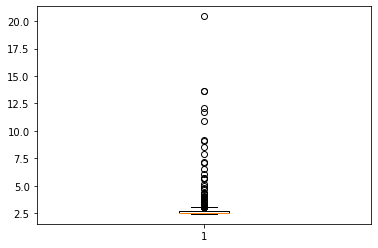

In [102]:
from matplotlib import pyplot as plt
plt.boxplot(y_pred)